## test the representation ability of neural network

epoch :  1
epoch :  2
epoch :  3
epoch :  4
epoch :  5
epoch :  6
epoch :  7
epoch :  8
epoch :  9
epoch :  10
epoch :  11
epoch :  12
epoch :  13
epoch :  14
epoch :  15
epoch :  16
epoch :  17
epoch :  18
epoch :  19
epoch :  20
epoch :  21
epoch :  22
epoch :  23
epoch :  24
epoch :  25
epoch :  26
epoch :  27
epoch :  28
epoch :  29
epoch :  30
epoch :  31
epoch :  32
epoch :  33
epoch :  34
epoch :  35
epoch :  36
epoch :  37
epoch :  38
epoch :  39
epoch :  40
epoch :  41
epoch :  42
epoch :  43
epoch :  44
epoch :  45
epoch :  46
epoch :  47
epoch :  48
epoch :  49
epoch :  50
epoch :  51
epoch :  52
epoch :  53
epoch :  54
epoch :  55
epoch :  56
epoch :  57
epoch :  58
epoch :  59
epoch :  60
epoch :  61
epoch :  62
epoch :  63
epoch :  64
epoch :  65
epoch :  66
epoch :  67
epoch :  68
epoch :  69
epoch :  70
epoch :  71
epoch :  72
epoch :  73
epoch :  74
epoch :  75
epoch :  76
epoch :  77
epoch :  78
epoch :  79
epoch :  80
epoch :  81
epoch :  82
epoch :  83
epoch :  84
e

epoch :  774
epoch :  775
epoch :  776
epoch :  777
epoch :  778
epoch :  779
epoch :  780
epoch :  781
epoch :  782
epoch :  783
epoch :  784
epoch :  785
epoch :  786
epoch :  787
epoch :  788
epoch :  789
epoch :  790
epoch :  791
epoch :  792
epoch :  793
epoch :  794
epoch :  795
epoch :  796
epoch :  797
epoch :  798
epoch :  799
epoch :  800
epoch :  801
epoch :  802
epoch :  803
epoch :  804
epoch :  805
epoch :  806
epoch :  807
epoch :  808
epoch :  809
epoch :  810
epoch :  811
epoch :  812
epoch :  813
epoch :  814
epoch :  815
epoch :  816
epoch :  817
epoch :  818
epoch :  819
epoch :  820
epoch :  821
epoch :  822
epoch :  823
epoch :  824
epoch :  825
epoch :  826
epoch :  827
epoch :  828
epoch :  829
epoch :  830
epoch :  831
epoch :  832
epoch :  833
epoch :  834
epoch :  835
epoch :  836
epoch :  837
epoch :  838
epoch :  839
epoch :  840
epoch :  841
epoch :  842
epoch :  843
epoch :  844
epoch :  845
epoch :  846
epoch :  847
epoch :  848
epoch :  849
epoch :  850

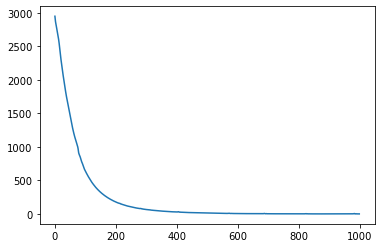

In [10]:
import torch
import torch.nn as nn
import numpy as np
from torch import optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import matplotlib.pyplot as plt

class basic_model(nn.Module):
    
    def __init__(self, neck_len):
        super(basic_model, self).__init__()
        
        self.fc1 = nn.Linear(1,neck_len)
        
        self.rl1 = nn.Tanh()
        
        self.fc2 = nn.Linear(neck_len, neck_len)
        
        self.rl2 = nn.Tanh()
        
        self.fc3 = nn.Linear(neck_len,1)
        
    def forward(self, x):
        
        out = self.rl1(self.fc1(x))
        
        out = self.rl2(self.fc2(out))
        
        out = self.fc3(out)
        
        return out
    
    
SAMPLE_AMOUNT = 100
NECK_LEN = 10
ADAM_LR = 0.05
EPOCHS = 1000

INPUT = np.zeros((SAMPLE_AMOUNT , 1))
OUTPUT = np.zeros((SAMPLE_AMOUNT , 1))
func = lambda x : x**2 + 3*x


data = np.random.uniform(-10,10,SAMPLE_AMOUNT)

output = np.array([func(x) for x in data])

INPUT = np.expand_dims(data,axis=1)

OUTPUT = np.expand_dims(output,axis=1)

train_dataset = TensorDataset(torch.Tensor(INPUT),torch.Tensor(OUTPUT))   
train_loader = DataLoader(train_dataset, shuffle=True, batch_size = SAMPLE_AMOUNT)

model = basic_model(neck_len=NECK_LEN)
optimizer = optim.Adam(model.parameters(), lr = ADAM_LR)
criterion = nn.MSELoss()
training_losses = []

for epo in range(1,EPOCHS+1):
    print("epoch : ",epo)
    for step, (IN, TEST) in enumerate(train_loader):
        OUT = model(IN)
        loss = criterion(OUT,TEST)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        training_losses.append(loss.detach().item())

plt.plot(training_losses)   

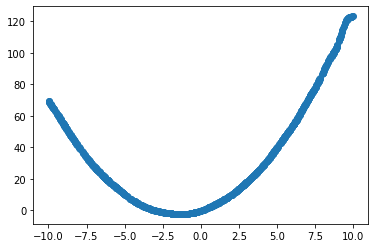

In [11]:
X = np.random.uniform(-10,10,1000)
Y = model(torch.Tensor(np.expand_dims(X,axis=1))).detach().numpy().squeeze()
plt.scatter(X,Y)

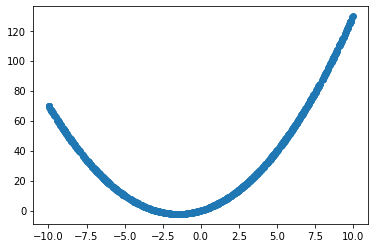

In [12]:
Z = np.array([func(x) for x in X])
plt.scatter(X,Z)